In [1]:
import numpy as np
from matplotlib      import pyplot as plt
from sklearn.mixture import GaussianMixture

Some events form in different astrophysical environments than others. **You want to figure out how many of formation channels are at play.**


The strategy here is to fit a Gaussian Mixture model: that is, my model is a sum of $N$ gaussians each with mean $\mu_j$ and standard deviation $\sigma_j$ and weight $\alpha_j$:

$p(x_i|\theta) = \sum_{j=1}^N \alpha_j \mathcal{N}(\mu_j,\sigma_j) $

This depends on $3N-1$ parameters (not $3N$ because the sum of the $\alpha_j$ must be unity to ensure that this is a probability.

#### Tasks

1) Load this file (`np.load`) and complete a quick exploration of the data. How many modes do you think you see?

A: maybe 3?

In [2]:
data = np.load('formationchannels.npy')

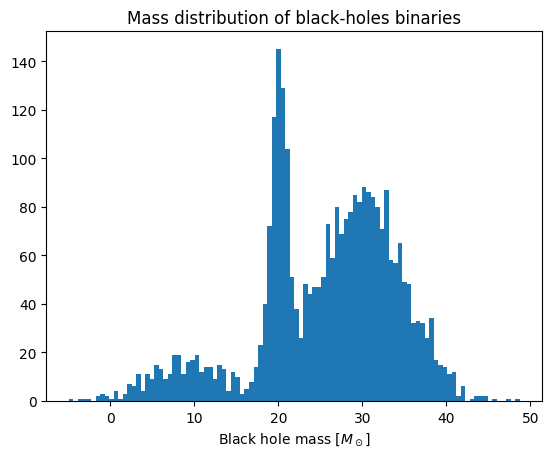

In [3]:
plt.hist(data, bins=100)
plt.xlabel('Black hole mass $[M_\odot]$')
plt.title('Mass distribution of black-holes binaries');

2) Take some time to explore `sklearn.mixture.GaussianMixture`. Check the documentation, some examples, the help menu, etc. You first need to define the model (instance of a class), and then train it on the data using the `fit` method (the data provided are already in the right numpy format!). This will output the trained model, which has various attributes.
3) Complete the fit 10 times with $N=1,...,10$ Gaussians.

In [4]:
# Note that the data are in the right format (N, 1) for sklearn
data.shape

(2950, 1)

In [5]:
# Number of Gaussian to try for the fit
N = np.arange(1,11)
# with Gaussian Mixture I create different models and train it on the data using fit
models = np.array([GaussianMixture(n).fit(data) for n in N])

4) For each of this fits, compute the AIC (easy! It's a attribute of the trained model!). Plot $N$ vs AIC: which model is preferred?

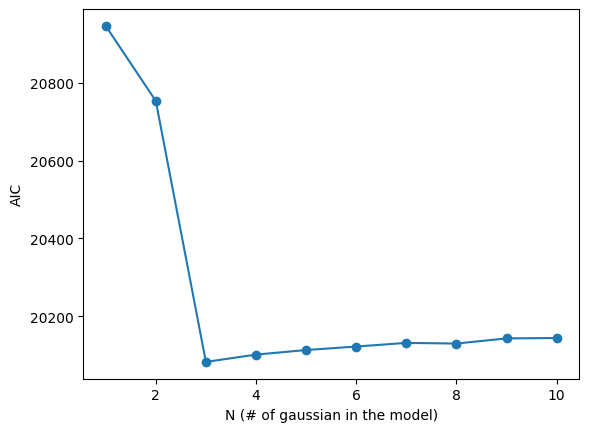

The best number of components is : 3


In [6]:
AIC= [model.aic(data) for model in models]

plt.plot(N, AIC)
plt.scatter(N, AIC)

plt.xlabel('N (# of gaussian in the model)')
plt.ylabel('AIC')
plt.show()

best_N = N[np.argmin(AIC)]
print('The best number of components is :', best_N)

5) Plot the preferred solution on top of the input data. You should get a very nice fit!

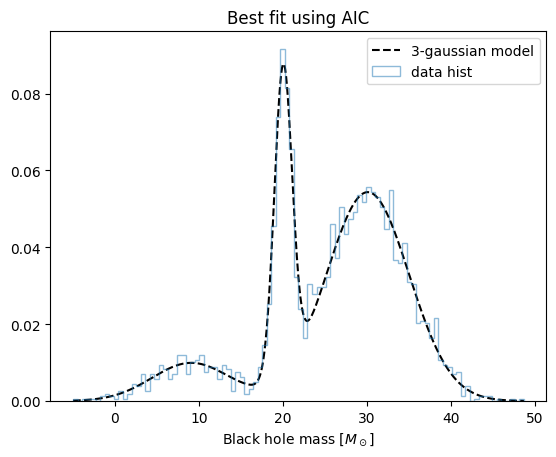

In [7]:
# Plot the model with best_N gaussians
asse_x = np.linspace(min(data), max(data), 1000)
# The score_sample method computes the log-likelihood of each sample
log_l = models[best_N-1].score_samples(asse_x)
# I need to do the exponentail because score_sample is a log
# pdf = exp(log_likelihood)
plt.plot(asse_x, np.exp(log_l), '--k', label='3-gaussian model')

plt.hist(data, bins=100, density=True, alpha=0.5, histtype='step', label='data hist')
plt.xlabel('Black hole mass $[M_\odot]$')
plt.title('Best fit using AIC')
plt.legend()
plt.show()

6) Understand (i.e. plot) which Gaussian mode corresponds to which part of the input dataset. 

*Hint:* Useful methods here are `score_samples` and `predict_proba`: you'll need them both. Try to understand what they do and how you can put them together.

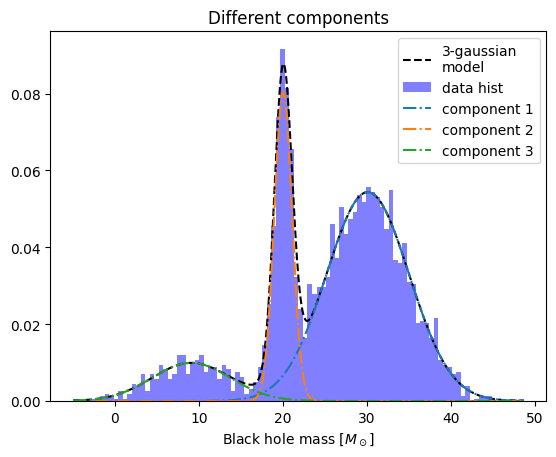

In [9]:
plt.plot(asse_x, np.exp(log_l), '--k', label='3-gaussian\nmodel')
plt.hist(data, bins=100, density=True, alpha=0.5, color='blue' ,label='data hist')

# The predict_proba method evaluates the components’ density for each sample
densities = models[best_N-1].predict_proba(asse_x)
pdfs = densities*np.exp(log_l).reshape(-1,1)

for i in range(best_N):
    plt.plot(asse_x, pdfs[:,i], '-.', label='component %i' %(i+1))
    
plt.xlabel('Black hole mass $[M_\odot]$')
plt.title('Different components')
plt.legend()
plt.show()